In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import random
from math import pi

%matplotlib inline
%run "../notebooks/cargar_df.ipynb"

In [2]:
train=get_train()

In [3]:
train.head().T

,0,1,2,3,4
ID,27761,27760,27446,16808,16805
Region,EMEA,EMEA,Americas,Americas,Americas
Territory,None,None,NW America,NW America,NW America
"Pricing, Delivery_Terms_Quote_Appr",1,0,0,1,1
"Pricing, Delivery_Terms_Approved",1,0,0,0,0
Bureaucratic_Code_0_Approval,1,0,0,1,1
Bureaucratic_Code_0_Approved,1,0,0,0,0
Bureaucratic_Code,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_5,Bureaucratic_Code_5
Account_Created_Date,2015-06-16 00:00:00,2015-06-16 00:00:00,2015-04-21 00:00:00,2013-07-27 00:00:00,2013-07-27 00:00:00
Source,None,None,Source_7,Source_11,Source_11


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int16         
 1   Region                              16947 non-null  category      
 2   Territory                           16947 non-null  category      
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int16         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int16         
 5   Bureaucratic_Code_0_Approval        16947 non-null  category      
 6   Bureaucratic_Code_0_Approved        16947 non-null  category      
 7   Bureaucratic_Code                   16947 non-null  category      
 8   Account_Created_Date                16947 non-null  datetime64[ns]
 9   Source                              16947 non-null  object        
 10  Billing_Country       

In [5]:
# Creo otro data frame con los registros con stage closed 
train2 = train.copy()
train2 = train2.loc[(train2['Stage'] == 'Closed Won') | (train2['Stage'] == 'Closed Lost')]
train2['Stage'] = train2['Stage'].astype('category')
train2['Stage'] = train2['Stage'].cat.remove_unused_categories()
train2['Stage'].value_counts()

Closed Won     9533
Closed Lost    7350
Name: Stage, dtype: int64

In [6]:
train2['Account_Owner'].value_counts()

Person_Name_50    3722
Person_Name_13    1327
Person_Name_8     1286
Person_Name_43    1235
Person_Name_18    1093
Person_Name_3      875
Person_Name_32     681
Person_Name_4      662
Person_Name_65     631
Person_Name_64     569
Person_Name_16     439
Person_Name_46     381
Person_Name_45     357
Person_Name_2      333
Person_Name_38     322
Person_Name_42     304
Person_Name_66     254
Person_Name_60     226
Person_Name_59     201
Person_Name_49     200
Person_Name_62     179
Person_Name_54     178
Person_Name_52     172
Person_Name_21     166
Person_Name_5      152
Person_Name_63     135
Person_Name_55     129
Person_Name_51     108
Person_Name_39     104
Person_Name_33      86
Person_Name_14      74
Person_Name_61      71
Person_Name_44      57
Person_Name_41      51
Person_Name_9       50
Person_Name_58      14
Person_Name_26      12
Person_Name_11      10
Person_Name_29       8
Person_Name_25       7
Person_Name_36       7
Person_Name_23       4
Person_Name_34       3
Person_Name

In [7]:
train2['Opportunity_Owner'].value_counts()

Person_Name_50    3773
Person_Name_8     1422
Person_Name_13    1253
Person_Name_18     982
Person_Name_3      832
Person_Name_43     832
Person_Name_32     685
Person_Name_4      685
Person_Name_19     615
Person_Name_64     508
Person_Name_16     446
Person_Name_23     422
Person_Name_46     329
Person_Name_65     322
Person_Name_49     285
Person_Name_48     256
Person_Name_38     250
Person_Name_44     240
Person_Name_66     239
Person_Name_39     211
Person_Name_60     206
Person_Name_62     174
Person_Name_52     173
Person_Name_54     171
Person_Name_5      155
Person_Name_59     134
Person_Name_45     128
Person_Name_2      118
Person_Name_41     113
Person_Name_51     111
Person_Name_33      87
Person_Name_55      83
Person_Name_14      82
Person_Name_11      77
Person_Name_30      69
Person_Name_63      64
Person_Name_40      50
Person_Name_25      49
Person_Name_20      49
Person_Name_22      43
Person_Name_26      33
Person_Name_12      23
Person_Name_37      21
Person_Name

In [8]:
filtro = train2.agg(lambda x: str(x.Account_Owner) == str(x.Opportunity_Owner), axis=1)
df = train2.loc[filtro]
df

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-03-31,2018-02-01,Q1,2018,14,USD,7421881.50,USD,7421881.5,Closed Lost
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-28,2018-02-01,Q1,2018,25,USD,13357192.50,USD,13357192.5,Closed Lost
5,16802,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-03-31,2018-02-01,Q1,2018,28,USD,14838277.50,USD,14838277.5,Closed Lost
6,16799,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2017-05-01,2017-02-01,Q1,2017,7,USD,2659494.60,USD,2659494.6,Closed Lost
8,24353,Japan,None,1,0,0,0,Bureaucratic_Code_5,2015-04-20,None,...,2016-02-29,2016-02-01,Q1,2016,0,JPY,15600.00,JPY,470400.0,Closed Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,2016-03-25,2016-03-01,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won
16943,8786,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,2016-04-08,2016-04-01,Q2,2016,0,EUR,93015.00,EUR,299715.0,Closed Won
16944,8792,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,2016-03-31,2016-03-01,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won
16945,28561,Americas,NE America,1,1,1,1,Bureaucratic_Code_4,2015-10-20,None,...,2016-04-29,2016-04-01,Q2,2016,4,USD,2346796.88,USD,0.0,Closed Lost


In [9]:
df['Account_Owner'].value_counts()

Person_Name_50    3606
Person_Name_8     1260
Person_Name_13    1223
Person_Name_18     914
Person_Name_43     824
Person_Name_3      767
Person_Name_4      611
Person_Name_32     510
Person_Name_64     447
Person_Name_16     438
Person_Name_46     296
Person_Name_38     250
Person_Name_65     230
Person_Name_66     225
Person_Name_49     200
Person_Name_60     196
Person_Name_62     174
Person_Name_52     172
Person_Name_54     170
Person_Name_5      150
Person_Name_59     134
Person_Name_45     128
Person_Name_2       97
Person_Name_55      83
Person_Name_39      82
Person_Name_63      64
Person_Name_14      63
Person_Name_44      50
Person_Name_41      44
Person_Name_51      27
Person_Name_42      19
Person_Name_11      10
Person_Name_33       9
Person_Name_26       9
Person_Name_29       8
Person_Name_36       7
Person_Name_25       5
Person_Name_58       5
Person_Name_23       4
Person_Name_35       2
Person_Name_61       2
Person_Name_10       1
Person_Name_20       1
Person_Name

In [10]:
# Me quedo con los 10 vendedores con más negocios cerrados
owners = df['Account_Owner'].value_counts().nlargest(10)

In [11]:
df2 = df[df['Account_Owner'].isin(owners.index)].copy()
df2['Account_Owner'] = df2['Account_Owner'].cat.remove_unused_categories()
df2

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-03-31,2018-02-01,Q1,2018,14,USD,7421881.50,USD,7421881.5,Closed Lost
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-28,2018-02-01,Q1,2018,25,USD,13357192.50,USD,13357192.5,Closed Lost
5,16802,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-03-31,2018-02-01,Q1,2018,28,USD,14838277.50,USD,14838277.5,Closed Lost
6,16799,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2017-05-01,2017-02-01,Q1,2017,7,USD,2659494.60,USD,2659494.6,Closed Lost
8,24353,Japan,None,1,0,0,0,Bureaucratic_Code_5,2015-04-20,None,...,2016-02-29,2016-02-01,Q1,2016,0,JPY,15600.00,JPY,470400.0,Closed Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,2016-03-25,2016-03-01,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won
16943,8786,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,2016-04-08,2016-04-01,Q2,2016,0,EUR,93015.00,EUR,299715.0,Closed Won
16944,8792,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,2016-03-31,2016-03-01,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won
16945,28561,Americas,NE America,1,1,1,1,Bureaucratic_Code_4,2015-10-20,None,...,2016-04-29,2016-04-01,Q2,2016,4,USD,2346796.88,USD,0.0,Closed Lost


In [12]:
tabla = df2.groupby(['Account_Owner','Stage']).agg({'Stage':'count'}).unstack()\
.droplevel(0, axis=1).sort_values(by=['Closed Won'])
tabla

Stage,Closed Lost,Closed Won
Account_Owner,,
Person_Name_16,313,125
Person_Name_3,554,213
Person_Name_4,345,266
Person_Name_64,134,313
Person_Name_43,488,336
Person_Name_32,108,402
Person_Name_18,397,517
Person_Name_8,500,760
Person_Name_13,404,819


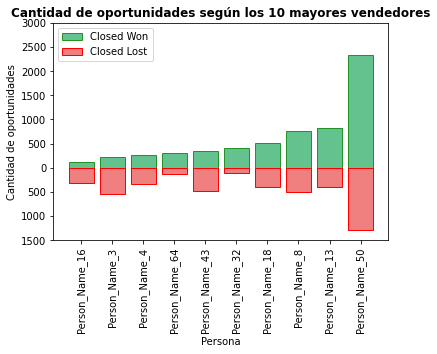

In [13]:
tabla['Closed Lost'] = tabla['Closed Lost'] * (-1)

r = [0,1,2,3,4,5,6,7,8,9]
fig, ax = plt.subplots()
bars = tabla['Closed Won']
 
plt.bar(r, tabla['Closed Won'], color='mediumseagreen', edgecolor='g', label='Closed Won', alpha=0.8)
plt.bar(r, tabla['Closed Lost'], color='lightcoral', edgecolor='r', label='Closed Lost')
 
plt.xticks(r, tabla.index, rotation=90)
ticks_loc = ax.get_yticks().tolist()
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels([int(abs(x)) for x in ticks_loc])

plt.xlabel("Persona")
plt.ylabel("Cantidad de oportunidades")
plt.title("Cantidad de oportunidades según los 10 mayores vendedores", fontweight='bold')
plt.legend()
plt.show()

In [14]:
train2['Billing_Country'].value_counts()

Japan            4856
United States    3790
Germany          1977
Australia        1165
India             671
                 ... 
Kenya               1
Chile               1
Colombia            1
Peru                1
Oman                0
Name: Billing_Country, Length: 80, dtype: int64

In [40]:
df3 = df[df['Account_Owner'].isin(owners.index)].copy()
df3

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-03-31,2018-02-01,Q1,2018,14,USD,7421881.50,USD,7421881.5,Closed Lost
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-28,2018-02-01,Q1,2018,25,USD,13357192.50,USD,13357192.5,Closed Lost
5,16802,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-03-31,2018-02-01,Q1,2018,28,USD,14838277.50,USD,14838277.5,Closed Lost
6,16799,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2017-05-01,2017-02-01,Q1,2017,7,USD,2659494.60,USD,2659494.6,Closed Lost
8,24353,Japan,None,1,0,0,0,Bureaucratic_Code_5,2015-04-20,None,...,2016-02-29,2016-02-01,Q1,2016,0,JPY,15600.00,JPY,470400.0,Closed Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,2016-03-25,2016-03-01,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won
16943,8786,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,2016-04-08,2016-04-01,Q2,2016,0,EUR,93015.00,EUR,299715.0,Closed Won
16944,8792,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,2016-03-31,2016-03-01,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won
16945,28561,Americas,NE America,1,1,1,1,Bureaucratic_Code_4,2015-10-20,None,...,2016-04-29,2016-04-01,Q2,2016,4,USD,2346796.88,USD,0.0,Closed Lost


In [41]:
# Elimino las categorias que no estan en este data frame
df3['Billing_Country'].cat.remove_unused_categories(inplace=True)
df3['Account_Owner'].cat.remove_unused_categories(inplace=True)

tabla = df3.groupby(['Account_Owner','Billing_Country']).agg({'Billing_Country':'count'})\
.unstack().droplevel(0,axis=1)
tabla

Billing_Country,Albania,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Cambodia,Canada,Chile,...,Reunion,Singapore,Slovakia,South Africa,Sweden,Switzerland,Thailand,Turkey,United Kingdom,United States
Account_Owner,,,,,,,,,,,,,,,,,,,,,
Person_Name_13,0,0,0,139,0,4,1,0,0,0,...,0,0,0,2,8,20,0,12,1,0
Person_Name_16,0,0,0,0,2,0,0,0,0,0,...,2,0,0,0,0,5,0,0,1,0
Person_Name_18,0,0,0,0,201,0,0,0,0,0,...,0,0,0,0,0,0,0,0,221,0
Person_Name_3,0,0,0,0,0,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,756
Person_Name_32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Person_Name_4,2,0,0,1,0,0,1,0,0,0,...,0,0,2,0,0,0,0,0,18,2
Person_Name_43,0,0,761,0,0,0,0,0,0,0,...,0,5,0,0,0,0,19,0,0,0
Person_Name_50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Person_Name_64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,447


In [42]:
# Me quedo con los territorios con más de 50 oportunidades
filtro = tabla.sum()[lambda x: x > 50].sort_values()
filtro

Billing_Country
Poland              51
Luxembourg         124
Austria            140
Belgium            203
United Kingdom     241
Netherlands        350
France             390
Australia          761
Germany           1556
United States     2438
Japan             4116
dtype: int64

In [43]:
tabla = tabla[filtro.index]
tabla

Billing_Country,Poland,Luxembourg,Austria,Belgium,United Kingdom,Netherlands,France,Australia,Germany,United States,Japan
Account_Owner,,,,,,,,,,,
Person_Name_13,0,0,139,0,1,0,0,0,1006,0,0
Person_Name_16,0,0,0,2,1,0,384,0,34,0,0
Person_Name_18,0,124,0,201,221,350,6,0,0,0,0
Person_Name_3,0,0,0,0,0,0,0,0,0,756,0
Person_Name_32,0,0,0,0,0,0,0,0,0,0,510
Person_Name_4,51,0,1,0,18,0,0,0,516,2,0
Person_Name_43,0,0,0,0,0,0,0,761,0,0,0
Person_Name_50,0,0,0,0,0,0,0,0,0,0,3606
Person_Name_64,0,0,0,0,0,0,0,0,0,447,0


In [44]:
plt.rcParams["figure.figsize"] = (15,6)

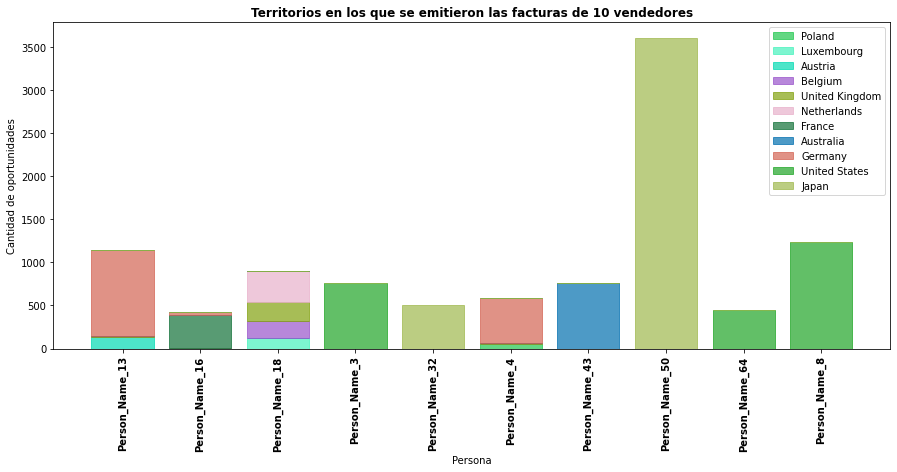

In [36]:
r = [0,1,2,3,4,5,6,7,8,9]
names = tabla.index
bars = [0,0,0,0,0,0,0,0,0,0]

for columna in tabla.columns:
    color = np.random.rand(3,)
    plt.bar(r, tabla[columna], color=color, bottom=bars, edgecolor=color, label=columna, alpha=0.7)
    bars = np.add(bars, tabla[columna]).tolist()
    
plt.xticks(r,labels=names, fontweight='bold', rotation=90)
plt.xlabel("Persona")
plt.ylabel("Cantidad de oportunidades")
plt.title("Territorios en los que se emitieron las facturas de 10 vendedores", fontweight='bold')
plt.legend()
plt.show()

In [15]:
#Para cada region los 5 vendedores con mas oportunidades

In [21]:
tabla = train2.pivot_table(index='Account_Owner', columns='Region', aggfunc={'Account_Owner':'count'}).droplevel(0,axis=1)
tabla

Region,APAC,Americas,EMEA,Japan,Middle East
Account_Owner,,,,,
Person_Name_10,0,0,1,0,0
Person_Name_11,10,0,0,0,0
Person_Name_13,9,5,1308,0,5
Person_Name_14,0,0,74,0,0
Person_Name_16,0,0,439,0,0
Person_Name_17,2,0,0,0,0
Person_Name_18,0,0,1089,4,0
Person_Name_2,1,0,331,0,1
Person_Name_20,0,0,1,0,0


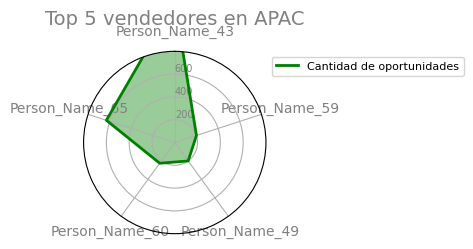

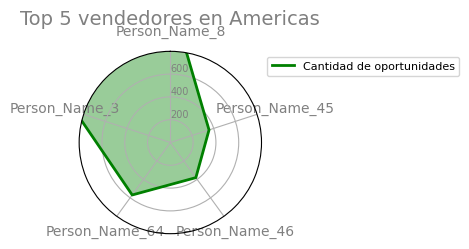

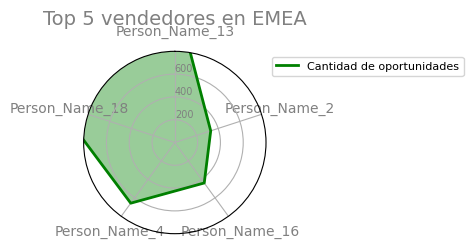

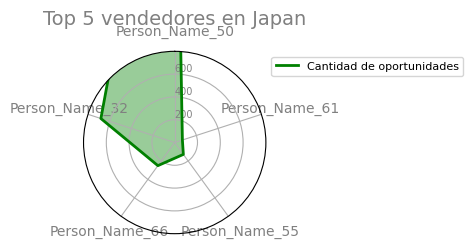

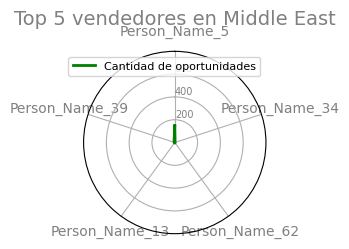

In [22]:
row = 0
for columna in tabla.columns:
    plt.figure(figsize=(8,8), dpi=100)

    categories = list(tabla[columna].nlargest(5).index)
    N = 5
 
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(2,3,row+1, polar=True)
    ax.set_theta_offset(pi / 2)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=10)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([200,400,600], ["200","400","600"], color="grey", size=7)
    plt.ylim(0,800)

    values=tabla[columna].nlargest(5).values.tolist()
    values += values[:1]
    ax.plot(angles, values, color='g', linewidth=2, linestyle='solid', label='Cantidad de oportunidades')
    ax.fill(angles, values, color='g', alpha=0.4)
    plt.legend(bbox_to_anchor=(1,1),fontsize=8)
    plt.title('Top 5 vendedores en ' + columna, size=14, color="grey", y=1.1)
    row += 1
    

In [23]:
tabla_won = train2[train2['Stage'] == 'Closed Won']\
            .pivot_table(index='Account_Owner', columns='Region', aggfunc={'Account_Owner':'count'}).droplevel(0,axis=1)
tabla_won

Region,APAC,Americas,EMEA,Japan,Middle East
Account_Owner,,,,,
Person_Name_10,0,0,0,0,0
Person_Name_11,0,0,0,0,0
Person_Name_13,2,0,886,0,3
Person_Name_14,0,0,22,0,0
Person_Name_16,0,0,126,0,0
Person_Name_17,0,0,0,0,0
Person_Name_18,0,0,597,0,0
Person_Name_2,0,0,183,0,0
Person_Name_20,0,0,0,0,0


In [24]:
tabla_lost = train2[train2['Stage'] == 'Closed Lost']\
            .pivot_table(index='Account_Owner', columns='Region', aggfunc={'Account_Owner':'count'}).droplevel(0,axis=1)
tabla_lost

Region,APAC,Americas,EMEA,Japan,Middle East
Account_Owner,,,,,
Person_Name_10,0,0,1,0,0
Person_Name_11,10,0,0,0,0
Person_Name_13,7,5,422,0,2
Person_Name_14,0,0,52,0,0
Person_Name_16,0,0,313,0,0
Person_Name_17,2,0,0,0,0
Person_Name_18,0,0,492,4,0
Person_Name_2,1,0,148,0,1
Person_Name_20,0,0,1,0,0


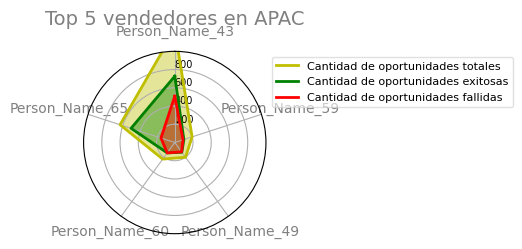

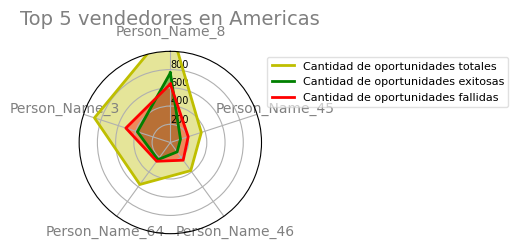

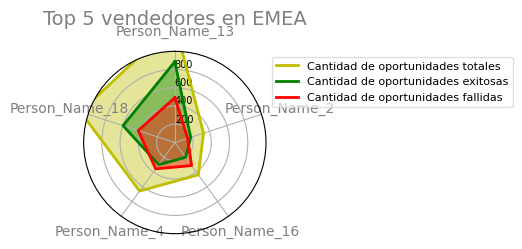

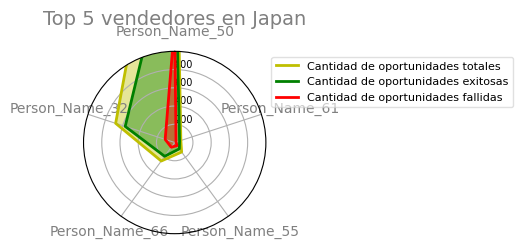

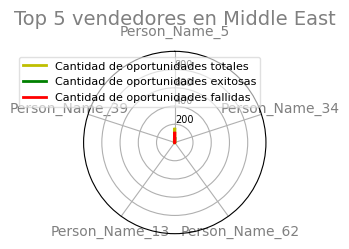

In [38]:
row = 0
for columna in tabla.columns:
    plt.figure(figsize=(8,8), dpi=100)

    categories = list(tabla[columna].nlargest(5).index)
    N = 5
 
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(2,3,row+1, polar=True)
    ax.set_theta_offset(pi / 2)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=10)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([200,400,600,800], ["200","400","600","800"], color="black", size=7)
    plt.ylim(0,1000)
    
    values=tabla[columna].nlargest(5).values.tolist()
    values += values[:1]
    ax.plot(angles, values, color='y', linewidth=2, linestyle='solid', label='Cantidad de oportunidades totales')
    ax.fill(angles, values, color='y', alpha=0.4)
    
    values=tabla_won[columna].nlargest(5).values.tolist()
    values += values[:1]
    ax.plot(angles, values, color='g', linewidth=2, linestyle='solid', label='Cantidad de oportunidades exitosas')
    ax.fill(angles, values, color='g', alpha=0.4)
    
    values=tabla_lost[columna].nlargest(5).values.tolist()
    values += values[:1]
    ax.plot(angles, values, color='r', linewidth=2, linestyle='solid', label='Cantidad de oportunidades fallidas')
    ax.fill(angles, values, color='r', alpha=0.4)
    
    plt.legend(bbox_to_anchor=(1,1), fontsize=8, framealpha=0.6)
    plt.title('Top 5 vendedores en ' + columna, size=14, color='grey', y=1.1)
    row += 1
    